**Assignment 18: Trigger fruit quality detection from a sensor - 10422030**

**Question:** Build the fruit quality detector!

Take everything you have learned so far and build the prototype fruit quality detector. Trigger image classification based off proximity using an AI model running on the edge, store the results of the classification in storage, and control an LED based off the ripeness of the fruit.

You should be able to piece this together using code you have previously written in all the lessons so far.

**Answer:** In this assignment, I use Google Drive and Colab to simualte the camera and sensor on real life. The model we still train in the previous assignment 15 so we reuse it.

**I. Build the system and using the Model to predict.**

**Step 1: Mount Google Drive**

Because I am using Google Drive and Colab to do this assignemnt so we need to Mount Google Drive to take the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2: Load the Model**

The Model I also trained in the assignment 15, this Model is about dectect the ripe and unripe tomato. So that, in this assignment we will use this model agian.

In [2]:
import tensorflow as tf

model_path = '/content/drive/MyDrive/Model_iot/tomato_fruits_trained_model.h5'  #change the path
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


**Step 3: Distance sensor simulator**

I don't have the "Distance sensor" so I will use Python to simalate the "Distance sensor"

In [27]:
import random

def simulate_distance():
    distance = random.uniform(5, 50)  # cm
    print(f"Simulated distance: {distance:.2f} cm")
    return distance
simulate_distance()

Simulated distance: 5.70 cm


5.696839373679236

**Step 4: Choose the image and show it**

Selected image: /content/drive/MyDrive/Model_iot/sample_test/riped_tomato_20.jpeg


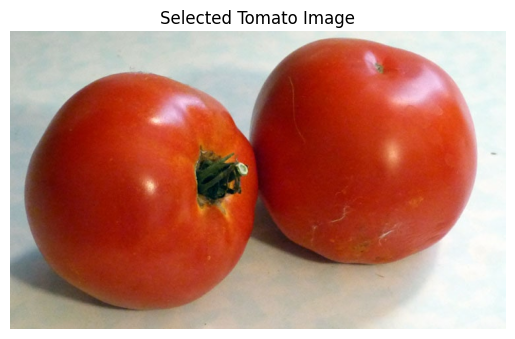

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/MyDrive/Model_iot/sample_test/riped_tomato_20.jpeg'
print(f"Selected image: {img_path}")

img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Selected Tomato Image")
plt.show()

The image above show that the Tomato is ripe and we an use it to predict with the Model and check to send the message to the LED.

**Step 5: Classify the Tomato with Model**

In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image

def classify_tomato(img_path):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)
    print("Raw prediction:", prediction)

    if prediction.shape[1] == 2:
        # Output is [prob_unripe, prob_ripe]
        label = 'ripe' if np.argmax(prediction) == 1 else 'unripe'
    else:
        # Output is single sigmoid (probability of ripe)
        label = 'ripe' if prediction[0][0] > 0.5 else 'unripe'

    print(f"Classification result: {label}")
    return label

# CALL the function to test
classify_tomato('/content/drive/MyDrive/Model_iot/sample_test/riped_tomato_20.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Raw prediction: [[-8.000718  6.234744]]
Classification result: ripe


'ripe'

When run the code, we can see the result is ripe.

**Step 6: Simulate turn ON/OFF LED**

If the tomato is ripe, the LED OFF. Otherwise, LED ON (unripe)

In [53]:
def control_led(classification_result):
    if classification_result == 'ripe':
        print("LED OFF (Tomato is ripe)")
    else:
        print("LED ON (Tomato is unripe)")

result = classify_tomato('/content/drive/MyDrive/Model_iot/sample_test/riped_tomato_20.jpeg')
control_led(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Raw prediction: [[-8.000718  6.234744]]
Classification result: ripe
LED OFF (Tomato is ripe)


We can see that the code show the LED OFF mean that the system can detect the Tomato is ripe.

**II. Conclusion**

The project has successfully built an automated system that simulates the accurate recognition process of tomatoes based on a pre-trained artificial intelligence (AI) model. The system operates with the following main functions:

+ Explaining variable distances
The system uses random simulation to replace physical sensors, determining whether there is an object (tomato) close enough to check. This ensures that only the objects that are performed are processed by the system, reducing the load on the following steps.

+ Simulated camera captures images
When detecting nearby objects, the system randomly selects images from the directory data, compatible with the actual tomato photography process. Displaying images helps users directly track and classify objects.

+ Classifying nine types using AI models
The system uses a trained AI model to classify tomato images into two groups: ripe (ripe) or unripe (unripe). Pipeline modeling running on Colab allows for fast, accurate, and easily scalable analysis.

+ Control device feedback (LED)
Based on the type of analysis results, the simulation signal control system (LED):
  
  -> If the tomato is ripe → LED off (no warning required).
  
  -> If the tomato is not ripe → LED on (warning required).

+ Integrate the entire pipeline simulation
The entire process is run on the Google Colab platform, no actual hardware required, making it easy to test, demonstrate, and develop new features.